In [1]:
import sys
sys.path.append('..')
from utils import *
from sklearn.metrics import mean_absolute_error

In [2]:
filename = ["Blogs", "Metabolic", "Drosophila", "Music", "Airports", "Proteome",\
            "USpowergrid", "Gnutella", "Words", "DBLP", "Internet", "Enron"]

In [3]:
net_label = 0
print(filename[net_label])
G = load_graph_data(filename[net_label])
N = len(G)

if N < 10000:
    l = 4
    labels = ['$l=1$', '$l=2$', '$l=3$']
elif N >= 10000 and N < 20000:
    l = 5
    labels = ['$l=1$', '$l=2$', '$l=3$', '$l=4$']
else:
    l = 6
    labels = ['$l=1$', '$l=2$', '$l=3$', '$l=4$', '$l=5$']
    
x = np.arange(len(labels))

Blogs


In [4]:
Fr = np.loadtxt("./SIR_Rt_It/SIR_Rt_"+filename[net_label]+ "_DC_plus.dat")
Fi = np.loadtxt("./SIR_Rt_It/SIR_It_"+filename[net_label]+ "_DC_plus.dat")

In [5]:
R_MAE_01 = mean_absolute_error(Fr[:, 1], Fr[:, 2])
R_MAE_02 = mean_absolute_error(Fr[:, 1], Fr[:, 3])
R_MAE_03 = mean_absolute_error(Fr[:, 1], Fr[:, 4])

R_MAE_list = [R_MAE_01, R_MAE_02, R_MAE_03]

if l > 4:
    R_MAE_04 = mean_absolute_error(Fr[:, 1], Fr[:, 5])
    R_MAE_list.append(R_MAE_04)
if l > 5:
    R_MAE_05 = mean_absolute_error(Fr[:, 1], Fr[:, 6])
    R_MAE_list.append(R_MAE_05)
print(R_MAE_list)


I_MAE_01 = mean_absolute_error(Fi[:, 1], Fi[:, 2])
I_MAE_02 = mean_absolute_error(Fi[:, 1], Fi[:, 3])
I_MAE_03 = mean_absolute_error(Fi[:, 1], Fi[:, 4])
I_MAE_list = [I_MAE_01, I_MAE_02, I_MAE_03]
if l > 4:
    I_MAE_04 = mean_absolute_error(Fi[:, 1], Fi[:, 5])
    I_MAE_list.append(I_MAE_04)
if l > 5:   
    I_MAE_05 = mean_absolute_error(Fi[:, 1], Fi[:, 6])
    I_MAE_list.append(I_MAE_05)

print(I_MAE_list)

[0.09566398235294118, 0.09759493921568627, 0.09732459607843139]
[0.018545494313725493, 0.020197473529411765, 0.019694158823529408]


#### 剪枝处理

In [6]:
Fr_prune = np.loadtxt("./SIR_Rt_It/SIR_Rt_"+filename[net_label]+ "_DC_plus_prune.dat")
Fi_prune = np.loadtxt("./SIR_Rt_It/SIR_It_"+filename[net_label]+ "_DC_plus_prune.dat")

In [7]:
prune_R_MAE_01 = mean_absolute_error(Fr[:, 1], Fr_prune[:, 1])
prune_R_MAE_02 = mean_absolute_error(Fr[:, 1], Fr_prune[:, 2])
prune_R_MAE_03 = mean_absolute_error(Fr[:, 1], Fr_prune[:, 3])
prune_R_MAE_list = [prune_R_MAE_01, prune_R_MAE_02, prune_R_MAE_03]
if l > 4:
    prune_R_MAE_04 = mean_absolute_error(Fr[:, 1], Fr_prune[:, 4])
    prune_R_MAE_list.append(prune_R_MAE_04)
if l > 5:
    prune_R_MAE_05 = mean_absolute_error(Fr[:, 1], Fr_prune[:, 5])
    prune_R_MAE_list.append(prune_R_MAE_05)
print(prune_R_MAE_list)


prune_I_MAE_01 = mean_absolute_error(Fi[:, 1], Fi_prune[:, 1])
prune_I_MAE_02 = mean_absolute_error(Fi[:, 1], Fi_prune[:, 2])
prune_I_MAE_03 = mean_absolute_error(Fi[:, 1], Fi_prune[:, 3])
prune_I_MAE_list = [prune_I_MAE_01, prune_I_MAE_02, prune_I_MAE_03]
if l > 4:
    prune_I_MAE_04 = mean_absolute_error(Fi[:, 1], Fi_prune[:, 4])
    prune_I_MAE_list.append(prune_I_MAE_04)
if l > 5:   
    prune_I_MAE_05 = mean_absolute_error(Fi[:, 1], Fi_prune[:, 5])
    prune_I_MAE_list.append(prune_I_MAE_05)

print(prune_I_MAE_list)

[0.016715278431372545, 0.013768658823529407, 0.005687607843137246]
[0.00347530666666667, 0.004113105490196077, 0.006508738823529413]


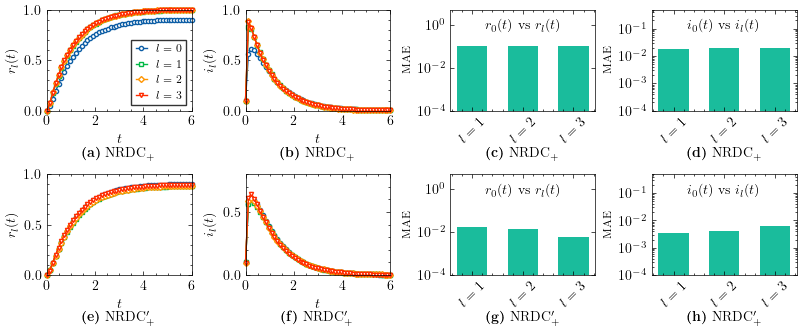

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(8, 3.3), constrained_layout=True)
ax = axs[0, 0]
ax.plot(Fr[:, 0], Fr[:, 1], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(Fr[:, 0], Fr[:, 2], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(Fr[:, 0], Fr[:, 3], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(Fr[:, 0], Fr[:, 4], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))           
if l > 4:
    ax.plot(Fr[:, 0], Fr[:, 5], marker = '^', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(4))            
if l > 5:
    ax.plot(Fr[:, 0], Fr[:, 6], marker = 'H', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(5))  
ax.set_xlim(0.0, 6.0)
ax.set_ylim(0.0, 1.0)
ax.set_title(r"\textbf{(a)} NRDC$_{+}$", loc='center', y=-0.55, fontsize=10)
ax.set_xlabel("$t$")
ax.set_ylabel("$r_l(t)$")
if net_label < 10:
    ax.legend(loc=0, edgecolor = "black", handlelength=1.0, fontsize=8, frameon=True, fancybox=False)
else:
    ax.legend(loc=0, edgecolor = "black", ncol = 2, columnspacing=0.75, handletextpad=0.5, labelspacing=0.1, handlelength=1.0, fontsize=8, frameon=True, fancybox=False)   


ax = axs[0, 1]
ax.plot(Fi[:, 0], Fi[:, 1], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(Fi[:, 0], Fi[:, 2], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(Fi[:, 0], Fi[:, 3], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(Fi[:, 0], Fi[:, 4], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))
if l > 4:
    ax.plot(Fi[:, 0], Fi[:, 5], marker = '^', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(4))            
if l > 5:
    ax.plot(Fi[:, 0], Fi[:, 6], marker = 'H', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(5))  
ax.set_xlim(0.0, 6.0)
ax.set_ylim(0.0, 1.0)
ax.set_title(r"\textbf{(b)} NRDC$_{+}$", loc='center', y=-0.55, fontsize=10)
ax.set_xlabel("$t$")
ax.set_ylabel("$i_l(t)$")


ax = axs[0, 2]
bars = ax.bar(x, R_MAE_list, color='#1abc9c', width=0.6)
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10) 
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5)
ax.set_yscale("log")
ax.set_title(r"\textbf{(c)} NRDC$_{+}$", loc='center', y=-0.55, fontsize=10)
ax.text(0.5, 0.8, '$r_0(t)$ vs $r_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)

ax = axs[0, 3]
bars = ax.bar(x, I_MAE_list, color='#1abc9c', width=0.6)
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5e-1)
ax.set_yscale("log")
ax.set_title(r"\textbf{(d)} NRDC$_{+}$", loc='center', y=-0.55, fontsize=10)
ax.text(0.5, 0.8, '$i_0(t)$ vs $i_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)



ax = axs[1, 0]
ax.plot(Fr_prune[:, 0], Fr[:, 1], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(Fr_prune[:, 0], Fr_prune[:, 1], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(Fr_prune[:, 0], Fr_prune[:, 2], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(Fr_prune[:, 0], Fr_prune[:, 3], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))           
if l > 4:
    ax.plot(Fr_prune[:, 0], Fr_prune[:, 4], marker = '^', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(4))            
if l > 5:
    ax.plot(Fr_prune[:, 0], Fr_prune[:, 5], marker = 'H', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(5))  
ax.set_xlim(0.0, 6.0)
ax.set_ylim(0.0, 1.0)
ax.set_title(r"\textbf{(e)} NRDC$_{+}^{\prime}$", loc='center', y=-0.55, fontsize=10)
ax.set_xlabel("$t$")
ax.set_ylabel("$r_l(t)$")

ax = axs[1, 1]
ax.plot(Fi_prune[:, 0], Fi[:, 1], marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
ax.plot(Fi_prune[:, 0], Fi_prune[:, 1], marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
ax.plot(Fi_prune[:, 0], Fi_prune[:, 2], marker = 'D', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
ax.plot(Fi_prune[:, 0], Fi_prune[:, 3], marker = 'v', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))
if l > 4:
    ax.plot(Fi_prune[:, 0], Fi_prune[:, 4], marker = '^', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(4))            
if l > 5:
    ax.plot(Fi_prune[:, 0], Fi_prune[:, 5], marker = 'H', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(5))  
ax.set_xlim(0.0, 6.0)
ax.set_ylim(0.0, 0.8)
ax.set_title(r"\textbf{(f)} NRDC$_{+}^{\prime}$", loc='center', y=-0.55, fontsize=10)
ax.set_xlabel("$t$")
ax.set_ylabel("$i_l(t)$")


ax = axs[1, 2]
bars = ax.bar(x, prune_R_MAE_list, color='#1abc9c', width=0.6)
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5)
ax.set_yscale("log")
ax.set_title(r"\textbf{(g)} NRDC$_{+}^{\prime}$", loc='center', y=-0.55, fontsize=10)
ax.text(0.5, 0.8, '$r_0(t)$ vs $r_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)

ax = axs[1, 3]
bars = ax.bar(x, prune_I_MAE_list, color='#1abc9c', width=0.6)
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=10)
ax.set_ylabel('MAE', fontsize=8)
ax.set_ylim(1e-4, 5e-1)
ax.set_yscale("log")
ax.set_title(r"\textbf{(h)} NRDC$_{+}^{\prime}$", loc='center', y=-0.55, fontsize=10)
ax.text(0.5, 0.8, '$i_0(t)$ vs $i_l(t)$', fontsize=10, color='black', ha='center', transform=ax.transAxes)


plt.savefig("Fig_SIR_Rt_It_" + filename[net_label] + "_DC_plus.pdf")
plt.show()